In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as PCA

df=pd.read_csv("Dataset_Day14.csv")

display(df.head())
display(df.info())  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [2]:
# scaling the data(L2 normalization)
from sklearn.preprocessing import Normalizer

features = df.drop(columns=['Id', 'Species'])
labels = df['Species']

# Apply L2 normalization
normalizer = Normalizer(norm='l2')
normalized_features = normalizer.fit_transform(features)

normalized_data = pd.DataFrame(normalized_features, columns=features.columns)
normalized_data['Species'] = labels

display(normalized_data)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.803773,0.551609,0.220644,0.031521,Iris-setosa
1,0.828133,0.507020,0.236609,0.033801,Iris-setosa
2,0.805333,0.548312,0.222752,0.034269,Iris-setosa
3,0.800030,0.539151,0.260879,0.034784,Iris-setosa
4,0.790965,0.569495,0.221470,0.031639,Iris-setosa
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,Iris-virginica
146,0.729654,0.289545,0.579090,0.220054,Iris-virginica
147,0.716539,0.330710,0.573231,0.220474,Iris-virginica
148,0.674671,0.369981,0.587616,0.250281,Iris-virginica


Species  Iris-setosa  Iris-versicolor  Iris-virginica
Cluster                                              
0                 50               50              50


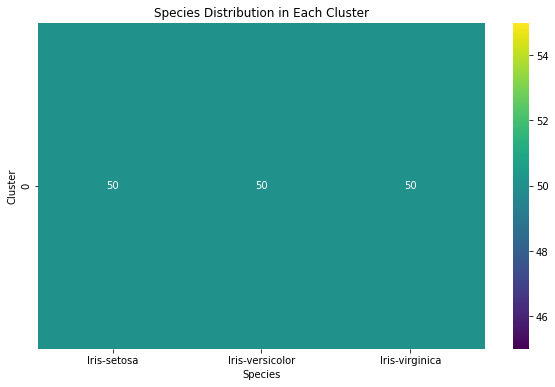

In [3]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN with default parameters (eps=0.8, min_samples=4)
dbscan = DBSCAN(eps=0.8, min_samples=4)
clusters = dbscan.fit_predict(normalized_features)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Show the species distribution in each cluster
cluster_species_distribution = df.groupby(['Cluster', 'Species']).size().unstack(fill_value=0)

print(cluster_species_distribution)

# Plotting the cluster species distribution
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_species_distribution, annot=True, fmt='d', cmap='viridis')
plt.title('Species Distribution in Each Cluster')
plt.xlabel('Species')
plt.ylabel('Cluster')
plt.show()

# OBSERVATIONS

->Within this single cluster (Cluster 0), there are 50 instances each of Iris-setosa, Iris-versicolor, and Iris-virginica. This is expected since the original dataset is balanced with 50 instances of each species.

# 3.	Use nearest neighbour algorithm to find the most optimal value of ‘eps’ parameter.

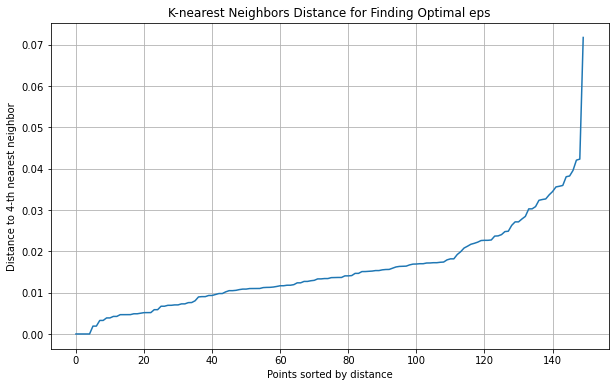

In [4]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-nearest neighbors distances
k = 4  # min_samples parameter in DBSCAN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(normalized_features)
distances, indices = neighbors.kneighbors(normalized_features)

# Sort the distances
sorted_distances = np.sort(distances[:,1])

# Plot the distances to find the "elbow" point
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('K-nearest Neighbors Distance for Finding Optimal eps')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(k))
plt.grid(True)
plt.show()

# OBSERVATIONS

Assuming the best optimal value to be at 0.04 approx(graph increases exponentially at this value)

# 4.	Use the ‘eps’ value in (2.) and find the most optimal value of ‘min_samples’ using silhouette score

In [5]:
from sklearn.metrics import silhouette_score

optimal_eps = 0.04

#  Find the most optimal value of ‘min_samples’ using silhouette score
min_samples_range = range(2, 10)  
best_min_samples = 0
best_silhouette_score = -1

for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(normalized_features)
    
    if len(set(clusters)) > 1:  # Only calculate silhouette score if there is more than 1 cluster
        score = silhouette_score(normalized_features, clusters)
        print(f"min_samples: {min_samples}, Silhouette Score: {score}")
        
        if score > best_silhouette_score:
            best_silhouette_score = score
            best_min_samples = min_samples

print(f'Best min_samples: {best_min_samples} with Silhouette Score: {best_silhouette_score}')

min_samples: 2, Silhouette Score: 0.6510977038613572
min_samples: 3, Silhouette Score: 0.6510977038613572
min_samples: 4, Silhouette Score: 0.673046369515429
min_samples: 5, Silhouette Score: 0.673046369515429
min_samples: 6, Silhouette Score: 0.6656277003015397
min_samples: 7, Silhouette Score: 0.6761926849426143
min_samples: 8, Silhouette Score: 0.6692996386716368
min_samples: 9, Silhouette Score: 0.6537548152770816
Best min_samples: 7 with Silhouette Score: 0.6761926849426143


# 5.	Find all the outliers using the DBSCAN algorithm. 

# 

4


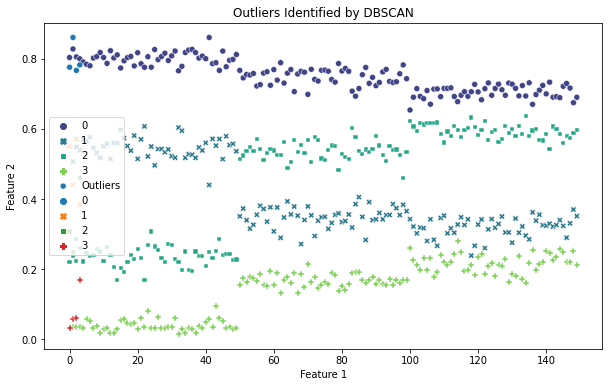

In [16]:
# Extract the features for clustering
X_combined = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]


# Apply DBSCAN with adjusted parameters
dbscan_combined = DBSCAN(eps=0.04, min_samples=5)
clusters_combined = dbscan_combined.fit_predict(normalized_features)

# Add the cluster labels to the original dataset
df['Cluster_Combined'] = clusters_combined

# Identify outliers
outliers = df[df['Cluster_Combined'] == -1]

# Print outliersprint("Outliers identified by DBSCAN:")
#print(outliers)
print(len(outliers))

# Visualize the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=normalized_features, palette='viridis')
sns.scatterplot(data=normalized_features[outliers.index], color='red', label='Outliers')
plt.title('Outliers Identified by DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# OBSERVATIONS

Each cluster appears to be well-separated along Feature 2, indicating that Feature 2 plays a significant role in distinguishing between the clusters.

The clusters are horizontally aligned, suggesting that the density along Feature 1 is consistent within each cluster.

The distinct separation of clusters along Feature 2 suggests that this feature is crucial for distinguishing different groups within the data.

The consistent density within each cluster along Feature 1 indicates that this feature does not significantly vary within each cluster but does help in separating clusters vertically.

